# MORE DATA CLEANING AND DATA DISTRIBUTION CHECK

imports, libraries, and options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth = 500
pd.options.display.max_columns = 99

sns.set(style="whitegrid")

<br>
read in climate df from pkl as df

In [2]:
df= pd.read_pickle('datasets/climate.pkl')

<br>
need to standardize all grape varietal names and only keep varietals that have 50 or more wines associated with them

In [3]:
# https://github.com/RoaldSchuring/studying_terroir/blob/master/Investigating%20Terroir.ipynb

wine_replacement = {'G-S-M, Rhône-style Red Blend': 'Rhône-style Red Blend', 'Meritage, Bordeaux-style Red Blend': 'Bordeaux-style Red Blend', 
                    'Cabernet Blend, Bordeaux-style Red Blend': 'Bordeaux-style Red Blend', 'Grenache-Syrah, Rhône-style Red Blend': 'Rhône-style Red Blend', 
                    'Cabernet Sauvignon-Merlot, Bordeaux-style Red Blend': 'Bordeaux-style Red Blend', 'Moscato, Muscat': 'Moscato', 
                    'Cabernet Sauvignon-Cabernet Franc, Bordeaux-style Red Blend': 'Bordeaux-style Red Blend', 'Grenache Blend, Grenache': 'Grenache', 
                    'Roussanne-Viognier, Rhône-style White Blend': 'Rhône-style White Blend', 'Garnacha, Grenache': 'Grenache', 
                    'Cabernet Franc-Merlot, Bordeaux-style Red Blend': 'Bordeaux-style Red Blend', 'Muscat': 'Moscato', 'Côt, Malbec': 'Malbec', 
                    'Merlot-Cabernet Sauvignon, Bordeaux-style Red Blend': 'Bordeaux-style Red Blend', 'Muskat, Muscat': 'Moscato', 
                    'Merlot-Cabernet Franc, Bordeaux-style Red Blend': 'Bordeaux-style Red Blend', 'Claret, Bordeaux-style Red Blend': 'Bordeaux-style Red Blend',
                    'Syrah-Grenache, Rhône-style Red Blend': 'Rhône-style Red Blend', 'Viognier-Roussanne, Rhône-style White Blend': 'Rhône-style White Blend', 
                    'Malbec-Cabernet Sauvignon, Bordeaux-style Red Blend': 'Bordeaux-style Red Blend', 
                    'Cabernet Sauvignon-Petit Verdot, Bordeaux-style Red Blend': 'Bordeaux-style Red Blend', 
                    'Cabernet Sauvignon-Malbec, Bordeaux-style Red Blend': 'Bordeaux-style Red Blend', 
                    'Cabernet, Bordeaux-style Red Blend': 'Bordeaux-style Red Blend', 'Viognier-Marsanne, Rhône-style White Blend': 'Rhône-style White Blend',
                    'Monastrell, Mourvèdre': 'Mourvèdre', 'Durif, Petite Sirah': 'Petite Sirah',
                    'Grenache-Mourvèdre, Rhône-style Red Blend': 'Rhône-style Red Blend', 'Grenache-Syrah, Rhône-style Red Blend': 'Rhône-style Red Blend',
                    'Mourvèdre-Syrah, Rhône-style Red Blend': 'Rhône-style Red Blend', 'Sémillon, Sémillon': 'Sémillon', 
                  }

# function that takes long name of wine and looks for it in wine_replacemnt dict and then replaces it with the standardized name
def standardize_wines(varietal_name):
    if varietal_name in wine_replacement:
        return wine_replacement[varietal_name]
    else:
        return varietal_name

# applies standardize_wines function to varietal column
df['varietal'] = df['varietal'].map(standardize_wines)

In [4]:
# only keeps varietals with counts greater than 50
# https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition
df= df.groupby('varietal').filter(lambda x : len(x)>50)
df['varietal'].value_counts()

Cabernet Sauvignon          2702
Pinot Noir                  1412
Chardonnay                  1147
Red Blends                  1052
Bordeaux-style Red Blend     968
Zinfandel                    862
Rhône-style Red Blend        721
Merlot                       703
Sauvignon Blanc              580
Grenache                     433
Petite Sirah                 396
Viognier                     344
Rosé                         293
Rhône-style White Blend      249
Cabernet Franc               217
Malbec                       189
Tempranillo                  173
Mourvèdre                    164
Sangiovese                   161
Grenache Blanc               124
Petit Verdot                 108
Roussanne                    102
Albariño                     101
White Blend                   96
Riesling                      85
Chenin Blanc                  52
Name: varietal, dtype: int64

<br>
need to remove all rows with words in the price column

In [8]:
# drops all rows with a null price value
df.dropna(subset= ['price'], inplace= True)

In [9]:
# searches for values in price column that contain the word Vivino
len(df.loc[df['price'].str.contains('Vivino')])

243

In [10]:
# removes all rows with Vivino in the price column
df= df[~df['price'].str.contains('Vivino')]
len(df.loc[df['price'].str.contains('Vivino')])

0

In [11]:
# searches for values in price column that contain the word Wine
len(df.loc[df['price'].str.contains('Wine')])

14

In [12]:
# removes all rows with Wine in the price column
df= df[~df['price'].str.contains('Wine')]
len(df.loc[df['price'].str.contains('Wine')])

0

In [15]:
# gets rid of the $ in the price column and coverts dtype to float
df['price']= df['price'].str.replace('$', '')
df['price']= df['price'].astype(str).astype(float)

C:\Users\kindb\AppData\Local\Temp/ipykernel_20128/1827275318.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price']= df['price'].str.replace('$', '')


<br>
need to remove all rows with an alcohol % > 18% since the majority of table wines won't be higher than that

In [16]:
df['alcohol'].unique()

array([nan, '15%', '14.1%', '14.5%', '14.4%', '13.9%', '12.3%', '13.7%',
       '13.8%', '14.6%', '13.4%', '14%', '12.2%', '15.4%', '13.2%',
       '15.9%', '15.6%', '15.5%', '14.9%', '15.2%', '14.3%', '13%',
       '14.8%', '14.2%', '14.7%', '13.5%', '15.1%', '15.7%', '15.8%',
       '16.2%', '13.6%', '12.5%', '15.3%', '11.5%', '16.3%', '13.1%',
       '16%', '16.8%', '16.5%', '13.75%', '17.1%', '12.8%', '13.85%',
       '4920%', '16.4%', '12.9%', '16.9%', '12.1%', '14.95%', '15.35%',
       '12.4%', '13.56%', '15.38%', '17.9%', '13.78%', '14.25%', '13.3%',
       '12%', '18.7%', '16.1%', '12.7%', '15.25%', '14.59%', '13.94%',
       '13.98%', '16.7%', '13.74%', '12.6%', '14.43%', '41%', '11.3%',
       '11.4%', '13.45%', '11.86%', '11.75%', '17.5%', '13.09%', '15.75%',
       '15.49%', '14.54%', '87%', '350%', '16.6%', '14.58%', '14.63%',
       '17.2%', '11.7%', '21%', '10.5%', '11%', '17%', '14.65%', '13.92%',
       '14.56%', '14.75%', '13.88%', '14.41%', '14.71%', '13.97%',
     

In [17]:
# remove % sign and convery dtype from object to float
df['alcohol']= df['alcohol'].str.replace('%', '')
df['alcohol']= df['alcohol'].astype(str).astype(float)

# drop all rows with alcohol content greater than 18%
df= df[df['alcohol'] < 18]

<br>
drop all columns with 3 in them for march because the North American grape growing season is April- October

In [18]:
df.drop(columns= ['3_prcp', '3_tmin', '3_tmax', '3_avg_tmin', '3_avg_tmax'], inplace = True)

In [19]:
df.columns

Index(['wine', 'name', 'vintage', 'category', 'varietal', 'winery',
       'appellation', 'designation', 'alcohol', 'price', 'rating', 'reviewer',
       'location', 'geocode', 'lat', 'long', 'id', '4_prcp', '4_tmin',
       '4_tmax', '4_avg_tmin', '4_avg_tmax', '5_prcp', '5_tmin', '5_tmax',
       '5_avg_tmin', '5_avg_tmax', '6_prcp', '6_tmin', '6_tmax', '6_avg_tmin',
       '6_avg_tmax', '7_prcp', '7_tmin', '7_tmax', '7_avg_tmin', '7_avg_tmax',
       '8_prcp', '8_tmin', '8_tmax', '8_avg_tmin', '8_avg_tmax', '9_prcp',
       '9_tmin', '9_tmax', '9_avg_tmin', '9_avg_tmax', '10_prcp', '10_tmin',
       '10_tmax', '10_avg_tmin', '10_avg_tmax'],
      dtype='object')

<br>
add seasonal columns to df for data viz

In [20]:
# seasonal precipitation columns
df['spring_prcp_tot']= df['4_prcp'] + df['5_prcp']
df['summer_prcp_tot']= df['6_prcp'] + df['7_prcp'] + df['8_prcp']
df['autumn_prcp_tot']= df['9_prcp'] + df['10_prcp']

# seasonal avg temperature maximum columns
df['spring_tmax_avg']= (df['4_avg_tmax'] + df['5_avg_tmax'])/ 2
df['summer_tmax_avg']= (df['6_avg_tmax'] + df['7_avg_tmax'] + df['8_avg_tmax'])/ 3
df['autumn_tmax_avg']= (df['9_avg_tmax'] + df['10_avg_tmax'])/ 2

# seasonal avg temperature minimum columns
df['spring_tmin_avg']= (df['4_avg_tmin'] + df['5_avg_tmin'])/ 2
df['summer_tmin_avg']= (df['6_avg_tmin'] + df['7_avg_tmin'] + df['8_avg_tmin'])/ 3
df['autumn_tmin_avg']= (df['9_avg_tmin'] + df['10_avg_tmin'])/ 2

In [21]:
df.columns

Index(['wine', 'name', 'vintage', 'category', 'varietal', 'winery',
       'appellation', 'designation', 'alcohol', 'price', 'rating', 'reviewer',
       'location', 'geocode', 'lat', 'long', 'id', '4_prcp', '4_tmin',
       '4_tmax', '4_avg_tmin', '4_avg_tmax', '5_prcp', '5_tmin', '5_tmax',
       '5_avg_tmin', '5_avg_tmax', '6_prcp', '6_tmin', '6_tmax', '6_avg_tmin',
       '6_avg_tmax', '7_prcp', '7_tmin', '7_tmax', '7_avg_tmin', '7_avg_tmax',
       '8_prcp', '8_tmin', '8_tmax', '8_avg_tmin', '8_avg_tmax', '9_prcp',
       '9_tmin', '9_tmax', '9_avg_tmin', '9_avg_tmax', '10_prcp', '10_tmin',
       '10_tmax', '10_avg_tmin', '10_avg_tmax', 'spring_prcp_tot',
       'summer_prcp_tot', 'autumn_prcp_tot', 'spring_tmax_avg',
       'summer_tmax_avg', 'autumn_tmax_avg', 'spring_tmin_avg',
       'summer_tmin_avg', 'autumn_tmin_avg'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11573 entries, 7 to 14080
Data columns (total 61 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   wine             11573 non-null  object 
 1   name             11573 non-null  object 
 2   vintage          11573 non-null  int64  
 3   category         11573 non-null  object 
 4   varietal         11573 non-null  object 
 5   winery           11573 non-null  object 
 6   appellation      11573 non-null  object 
 7   designation      8157 non-null   object 
 8   alcohol          11573 non-null  float64
 9   price            11573 non-null  float64
 10  rating           11573 non-null  int64  
 11  reviewer         7361 non-null   object 
 12  location         11573 non-null  object 
 13  geocode          11573 non-null  object 
 14  lat              11573 non-null  float64
 15  long             11573 non-null  float64
 16  id               11573 non-null  object 
 17  4_prcp      

<br>
reset df index and save df as pkl for modelling and csv for maps

In [179]:
df.reset_index(drop= True, inplace= True)
df.to_pickle('datasets/df_for_modelling.pkl')


In [16]:
df.to_csv('datasets/df_for_tableau.csv', index= False)

<br>
make dataframes to perform eda on

In [23]:
df_month= df[['wine', 'name', 'vintage', 'category', 'varietal', 'winery', 'appellation', 'designation', 'alcohol', 'price', 'rating', 'reviewer', 'location', 
              'geocode', 'lat', 'long', 'id', '4_prcp', '4_tmin', '4_tmax', '4_avg_tmin', '4_avg_tmax', '5_prcp', '5_tmin', '5_tmax', '5_avg_tmin', '5_avg_tmax', 
              '6_prcp', '6_tmin', '6_tmax', '6_avg_tmin', '6_avg_tmax', '7_prcp', '7_tmin', '7_tmax', '7_avg_tmin', '7_avg_tmax', '8_prcp', '8_tmin', '8_tmax', 
              '8_avg_tmin', '8_avg_tmax', '9_prcp', '9_tmin', '9_tmax', '9_avg_tmin', '9_avg_tmax', '10_prcp', '10_tmin', '10_tmax', '10_avg_tmin', 
              '10_avg_tmax']]

df_season= df[['wine', 'name', 'vintage', 'category', 'varietal', 'winery', 'appellation', 'designation', 'alcohol', 'price', 'rating', 'reviewer', 'location', 
               'geocode', 'lat', 'long', 'id', 'spring_prcp_tot', 'summer_prcp_tot', 'autumn_prcp_tot', 'spring_tmax_avg', 'summer_tmax_avg', 'autumn_tmax_avg', 
               'spring_tmin_avg', 'summer_tmin_avg', 'autumn_tmin_avg']]

In [18]:
# reds
red= df[df['category'].str.contains('Red')]
red.reset_index(drop= True, inplace= True)

# whites
white= df[df['category'].str.contains('White')]
white.reset_index(drop= True, inplace= True)

# rose
rose= df[df['category'].str.contains('Rose')]
rose.reset_index(drop= True, inplace= True)

# california
cali= df[df['location'].str.contains('California')]
cali.reset_index(drop= True, inplace= True)

# oregon
oregon= df[df['location'].str.contains('Oregon')]
oregon.reset_index(drop= True, inplace= True)

# washington
wash= df[df['location'].str.contains('Washington')]
wash.reset_index(drop= True, inplace= True)

# cab sav
cabsav= df[df['varietal'].str.contains('Cabernet Sauvignon')]
cabsav.reset_index(drop= True, inplace= True)

# paso robles
paso_robles= df[df['location'].str.contains('Paso Robles')]
paso_robles.reset_index(drop= True, inplace= True)

<br>
is the data normally distributed?

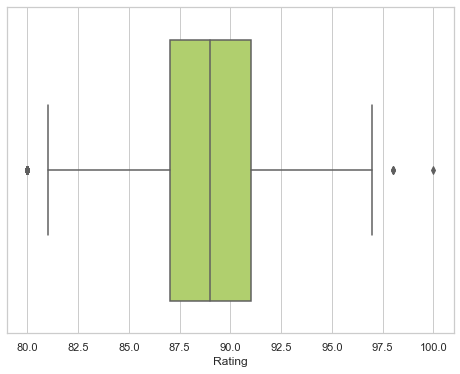

In [217]:
plt.figure(figsize= (8, 6))
sns.boxplot(data= df, x= 'rating', color= '#B6Df5e').set_xlabel('Rating');

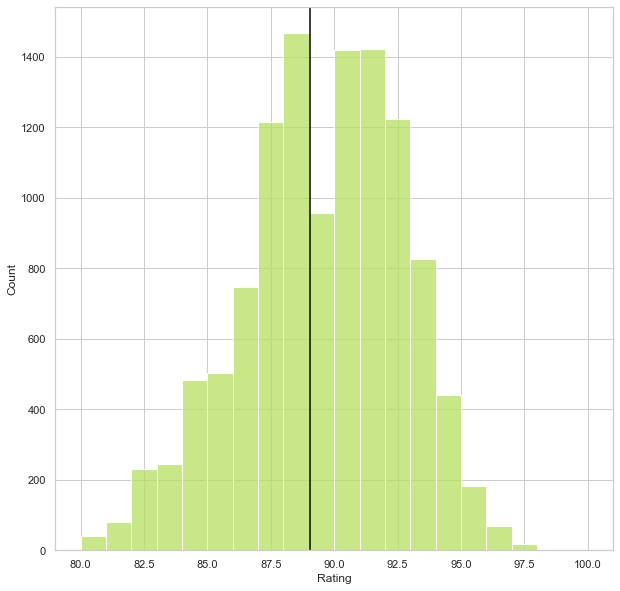

In [193]:
plt.figure(figsize= (10, 10))
sns.histplot(data= df, x= 'rating', kde= False, bins= 20, color= '#B6Df5e').set_xlabel('Rating')
plt.axvline(np.mean(df['rating']), color= 'black', label= 'mean')
plt.legend;

In [197]:
np.mean(df['rating'])

89.04907975460122

In [202]:
len(df.loc[df['rating'] > 89])

5607

In [201]:
len(df.loc[df['rating'] <= 89])

5966